In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [99]:
df = pd.read_csv('power.csv', sep=',', index_col=0, parse_dates=['sepDate'],
                infer_datetime_format=True, low_memory=False)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [115]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075259 entries, 1 to 2075259
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   sepDate  datetime64[ns]
 1   impGAP   float64       
 2   impGRP   float64       
 3   impVol   float64       
 4   impGlin  float64       
 5   impSub1  float64       
 6   impSub2  float64       
 7   impSub3  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 222.5 MB


In [101]:
df.dtypes

sepDate    datetime64[ns]
impGAP            float64
impGRP            float64
impVol            float64
impGlin           float64
impSub1           float64
impSub2           float64
impSub3           float64
dtype: object

In [117]:
df.set_index('sepDate',)

,impGAP,impGRP,impVol,impGlin,impSub1,impSub2,impSub3
sepDate,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [118]:
#df = df.fillna(df.mean())
df.isnull().sum()


sepDate    0
impGAP     0
impGRP     0
impVol     0
impGlin    0
impSub1    0
impSub2    0
impSub3    0
dtype: int64

In [132]:
df1 = df.resample('M', on='sepDate').sum()

In [133]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2006-12-31 to 2010-11-30
Freq: M
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   impGAP   48 non-null     float64
 1   impGRP   48 non-null     float64
 2   impVol   48 non-null     float64
 3   impGlin  48 non-null     float64
 4   impSub1  48 non-null     float64
 5   impSub2  48 non-null     float64
 6   impSub3  48 non-null     float64
dtypes: float64(7)
memory usage: 3.0 KB


In [108]:
g = df.groupby(pd.Grouper(key='sepDate', freq='M'))
dfs = [group for _,group in g]

In [125]:
dfs[0]

,sepDate,impGAP,impGRP,impVol,impGlin,impSub1,impSub2,impSub3
1,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
3,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
4,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
5,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
21992,2006-12-31 23:55:00,2.574,0.132,241.89,10.6,0.0,0.0,0.0
21993,2006-12-31 23:56:00,2.576,0.132,242.06,10.6,0.0,0.0,0.0
21994,2006-12-31 23:57:00,2.586,0.134,242.61,10.6,0.0,0.0,0.0
21995,2006-12-31 23:58:00,2.648,0.212,241.93,11.0,0.0,0.0,0.0


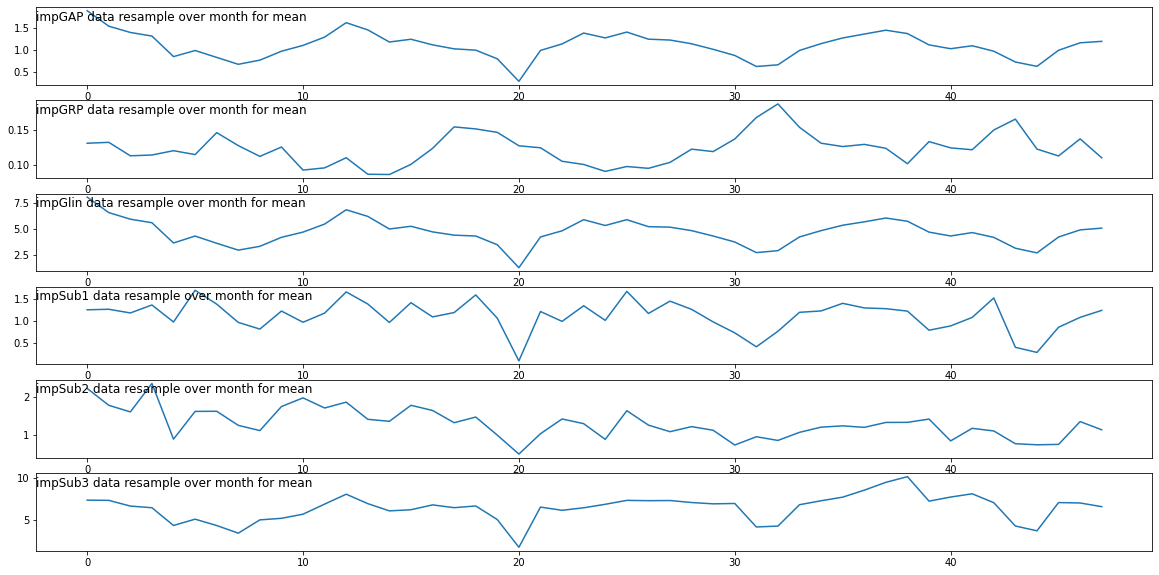

In [57]:
import matplotlib.pyplot as plt

i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(df.resample('M').mean().values[:, col])
    plt.title(df.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

Text(0.5, 1.0, 'Monthly resampling')

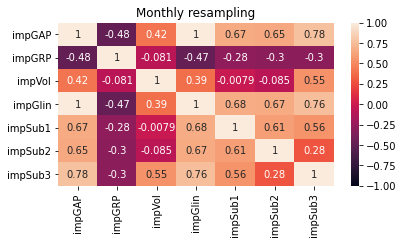

In [58]:
import seaborn as sns
f= plt.figure(figsize=(21,3))

ax=f.add_subplot(131)
dfm = df.resample('M').mean()
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)

In [168]:
w = 24
n_test = 12

In [184]:
temp = df1['impGAP']
print(temp.shape)
print(temp.head())

(48,)
sepDate
2006-12-31    41826.806
2007-01-31    69017.296
2007-02-28    56496.828
2007-03-31    58862.721
2007-04-30    36529.192
Freq: M, Name: impGAP, dtype: float64


In [185]:
#standardization for train
xmin = np.amin(temp[:-n_test])
xmax = np.amax(temp[:-n_test])
scale = xmax-xmin
temp = (temp-xmin)/scale



In [186]:
x = []
y = []
n_months = temp.shape[0]
for i in range(0, n_months-w-n_test):
    x.append(temp[i:i+w])
    y.append(temp[i+w])
x = np.array(x)
y = np.array(y)
print(x[:3])  # debug
print(y[:3])  # debug

[[0.48924464 0.94045428 0.73268473 0.77194528 0.40133395 0.52545469
  0.3881404  0.29024588 0.36136475 0.49015792 0.61294932 0.7231474
  1.         0.87667431 0.61388914 0.71767291 0.59516972 0.5539307
  0.50779524 0.38389501 0.         0.50320029 0.63767203 0.78977254]
 [0.94045428 0.73268473 0.77194528 0.40133395 0.52545469 0.3881404
  0.29024588 0.36136475 0.49015792 0.61294932 0.7231474  1.
  0.87667431 0.61388914 0.71767291 0.59516972 0.5539307  0.50779524
  0.38389501 0.         0.50320029 0.63767203 0.78977254 0.74052813]
 [0.73268473 0.77194528 0.40133395 0.52545469 0.3881404  0.29024588
  0.36136475 0.49015792 0.61294932 0.7231474  1.         0.87667431
  0.61388914 0.71767291 0.59516972 0.5539307  0.50779524 0.38389501
  0.         0.50320029 0.63767203 0.78977254 0.74052813 0.83985922]]
[0.74052813 0.83985922 0.62948045]


In [187]:
#reshape
x = x.reshape(-1, w, 1)
y = y.reshape(-1, 1)
print(x.shape)
print(y.shape)

(12, 24, 1)
(12, 1)


In [188]:
#model
n_out = 1
n_hidden = 100

# early stopping and model checkpoint
es_cb = EarlyStopping(monitor='val_loss',
                      patience=30, verbose=1, mode='auto')

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(w, 1), return_sequences=False))
model.add(Dense(n_out, activation='linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.compile(loss="mean_squared_error", optimizer='adam')

In [175]:
%%time

# Learning 
n_epochs = 500
#n_epochs = 10
val_split = 0.2
batch_size = 1

fit_log = model.fit(x, y, batch_size=batch_size, epochs=n_epochs,
                    validation_split=val_split, callbacks=[es_cb])
#fit_log = model.fit(x, y, batch_size=batch_size, epochs=n_epochs,
#                    validation_split=val_split)

Epoch 1/500
9/9 [==============================] - 2s 71ms/step - loss: 0.2083 - val_loss: 0.1027
Epoch 2/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0348 - val_loss: 0.0232
Epoch 3/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0173 - val_loss: 0.0031
Epoch 4/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0106 - val_loss: 0.0011
Epoch 5/500
9/9 [==============================] - 0s 13ms/step - loss: 0.0047 - val_loss: 0.0017
Epoch 6/500
9/9 [==============================] - 0s 12ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 7/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0079 - val_loss: 9.3319e-04
Epoch 8/500
9/9 [==============================] - 0s 12ms/step - loss: 0.0126 - val_loss: 0.0019
Epoch 9/500
9/9 [==============================] - 0s 11ms/step - loss: 0.0085 - val_loss: 0.0079
Epoch 10/500
9/9 [==============================] - 0s 12ms/step - loss: 0.0115 - val_loss: 0.0029
Epoch 11/500
9/

In [176]:
# Against training data
pred = model.predict(x)
print(pred.shape)  # debug

(12, 1)


In [177]:
# Future prediction
future_test = temp[n_months-w-n_test:n_months-n_test]
future_test = future_test.values.reshape(future_test.shape[0],1)
print(future_test.shape)
print(future_test)  # debug

(24, 1)
[[0.98343911]
 [0.97479002]
 [0.85008548]
 [0.98023115]
 [0.91705871]
 [0.9725596 ]
 [0.89964624]
 [0.96777736]
 [0.97308225]
 [0.90855692]
 [0.97223745]
 [0.91213453]
 [0.99429765]
 [1.        ]
 [0.80093113]
 [0.98806791]
 [0.92025341]
 [0.97056276]
 [0.9150311 ]
 [0.98577858]
 [0.97991688]
 [0.91647901]
 [0.97677647]
 [0.92268234]]


In [178]:
future_result = []

for i in range(n_test):
    test_data = np.reshape(future_test, (1, w, 1))
    #print(test_data.shape)  # debug
    pred1 = model.predict(test_data)
    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, pred1)
    future_result = np.append(future_result, pred1)

In [179]:
mse = mean_squared_error(temp[-n_test:], future_result)
print('mse=', mse)

mse= 0.01267419260204137


In [1]:
# Plot Wave    
n_temp = len(temp)
n_pred = len(pred)
n_future = len(future_result)
plt.plot(range(0,n_temp), temp, color="b", label="raw")
plt.plot(range(w,w+n_pred), pred, color="r", label="predict")  
plt.plot(range(n_temp-n_test,n_temp-n_test+n_future), future_result,
         color="g", label="future") 
plt.xlabel('Month')
plt.ylabel('Global active power ')
plt.legend()
plt.show()

NameError: ignored

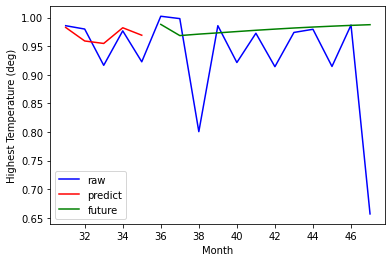

In [181]:
# Plot Wave
margin = 5
n_temp = len(temp)
n_pred = len(pred)
plt.plot(range(n_temp-n_test-margin,n_temp), temp[-n_test-margin:],
         color="b", label="raw")
plt.plot(range(w+n_pred-margin,w+n_pred), pred[-margin:], color="r", label="predict")  
plt.plot(range(n_temp-n_test,n_temp), future_result,
         color="g", label="future") 
plt.xlabel('Month')
plt.ylabel('Highest Temperature (deg)')
plt.legend()
plt.show()

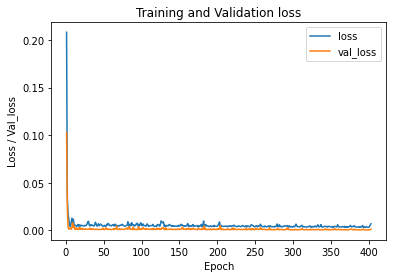

In [182]:
# Plot Training loss & Validation Loss
loss = fit_log.history["loss"]
val_loss = fit_log.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="loss" )
plt.plot(epochs, val_loss, label="val_loss")
plt.title("Training and Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss / Val_loss')
plt.legend()
plt.show()